<a href="https://colab.research.google.com/github/kanzaki-coder/deeplearning/blob/update-1.1/weed_VGG16_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#gitから回す用（本番）

!git clone https://github.com/kanzaki-coder/deeplearning.git

Cloning into 'deeplearning'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 101 (delta 3), reused 0 (delta 0), pack-reused 91
Receiving objects: 100% (101/101), 466.05 MiB | 13.18 MiB/s, done.
Resolving deltas: 100% (38/38), done.
Checking out files: 100% (25/25), done.


In [0]:
#複数のzipを展開する場合はディレクトリを用意する必要がある。
%cd /content/deeplearning
!mkdir weed_type
%cd /content/deeplearning/weed_type
!mkdir ichibi
!mkdir mameasagao
!mkdir mehishiba
!mkdir oinutade

/content/deeplearning
/content/deeplearning/weed_type


In [0]:
#for文で回した方がいいかも？

#各ディレクトリにzipファイルを展開
%cd /content/deeplearning/weed_type/
!unzip /content/deeplearning/hakidamegiku.zip

%cd /content/deeplearning/weed_type/
!unzip /content/deeplearning/hamasuge.zip

%cd /content/deeplearning/weed_type/
!unzip /content/deeplearning/hosoaogeitou.zip

%cd /content/deeplearning/weed_type/ichibi
!unzip /content/deeplearning/ichibi_1.zip
!unzip /content/deeplearning/ichibi_2.zip
!unzip /content/deeplearning/ichibi_3.zip
!unzip /content/deeplearning/ichibi_4.zip
!unzip /content/deeplearning/ichibi_5.zip
!unzip /content/deeplearning/ichibi_6.zip

%cd /content/deeplearning/weed_type/mameasagao
!unzip /content/deeplearning/mameasagao_1.zip
!unzip /content/deeplearning/mameasagao_2.zip
!unzip /content/deeplearning/mameasagao_3.zip
!unzip /content/deeplearning/mameasagao_4.zip
!unzip /content/deeplearning/mameasagao_5.zip


%cd /content/deeplearning/weed_type/mehishiba
!unzip /content/deeplearning/mehishiba_1.zip
!unzip /content/deeplearning/mehishiba_2.zip
!unzip /content/deeplearning/mehishiba_3.zip
!unzip /content/deeplearning/mehishiba_4.zip

%cd /content/deeplearning/weed_type/
!unzip /content/deeplearning/ohishiba.zip

%cd /content/deeplearning/weed_type/oinutade
!unzip /content/deeplearning/oinutade_1.zip
!unzip /content/deeplearning/oinutade_2.zip


%cd /content/deeplearning/weed_type/
!unzip /content/deeplearning/shiroza.zip

#本番用ここまで

In [1]:
#ドライブでマウントする場合
from google.colab import drive 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#VGG16とデータセット水増しを使う場合
from keras.applications import VGG16
conv_base=VGG16(weights='imagenet',
               include_top=False,
               input_shape=(150,150,3))


Using TensorFlow backend.






58892288/58889256 [==============================] - 1s 0us/step








In [0]:

from keras import models
from keras import layers
from keras.optimizers import Adam

model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu',input_dim=4*4*512))
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(9,activation='softmax'))
conv_base.trainable=False
model.compile(optimizer=Adam(lr=1e-3),
              loss='categorical_crossentropy',
             metrics=['accuracy'])
model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 2313      
Total params: 16,814,409
Trainable params: 2,099,721
Non-trainable params: 14,714,688
_________________________________________________________________


In [0]:
import os 
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import keras.preprocessing.image as Image

#clsdir = "/content/deeplearning/weed_type"
clsdir = "/content/drive/My Drive/cluster0312"



datagen = Image.ImageDataGenerator(
            featurewise_center = False,
            samplewise_center = False,
            featurewise_std_normalization = False,
            samplewise_std_normalization = False,
            zca_whitening = False,
            rotation_range = 90,
            width_shift_range = 0.3,
            height_shift_range = 0.3,
            horizontal_flip = True,
            vertical_flip = False,
            validation_split = 0.2,
            rescale=1./255
        )

train_generator=datagen.flow_from_directory(
            clsdir,
            target_size=(150,150),
            batch_size=20,
            class_mode='categorical',
            shuffle=True,
            subset = "training"
        )

validation_generator = datagen.flow_from_directory(
            clsdir,
            target_size=(150,150 ),
            batch_size=20,
            class_mode='categorical',
            shuffle=True,
            subset = "validation"
        )


Found 3129 images belonging to 20 classes.
Found 775 images belonging to 20 classes.


In [0]:
history=model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
    )

RuntimeError: ignored

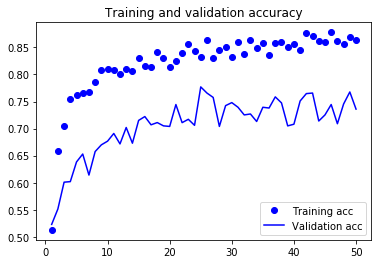

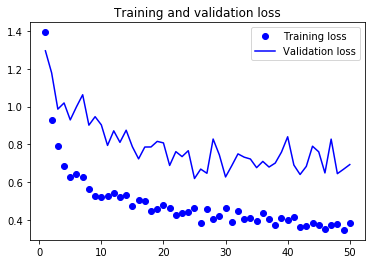

In [0]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

#正解率plot
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()


#損失値をplot
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [3]:
#ここからファインチューニング+VGG+水増し。ここから実行してOK（VGG16をダウンロード）
from keras.applications import VGG16
conv_base=VGG16(weights='imagenet',
               include_top=False,
               input_shape=(150,150,3))

Using TensorFlow backend.






58892288/58889256 [==============================] - 1s 0us/step








In [4]:
#畳み込み層の5層目のみを凍結解除
conv_base.summary()
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False



Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [0]:
#モデル確認
from keras import models
from keras import layers
from keras.optimizers import Adam

model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu',input_dim=4*4*512))
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(20,activation='softmax'))



In [6]:
import os 
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import keras.preprocessing.image as Image


#clsdir = "/content/deeplearning/weed_type"

clsdir = "/content/drive/My Drive/cluster0312"



datagen = Image.ImageDataGenerator(
            featurewise_center = False,
            samplewise_center = False,
            featurewise_std_normalization = False,
            samplewise_std_normalization = False,
            zca_whitening = False,
            rotation_range = 90,
            width_shift_range = 0.3,
            height_shift_range = 0.3,
            horizontal_flip = True,
            vertical_flip = False,
            validation_split = 0.2,
            rescale=1./255
        )
#validation_splitでtrainとvalidationの比率を変更できる。


train_generator=datagen.flow_from_directory(
            clsdir,
            target_size=(150,150),
            batch_size=20,
            class_mode='categorical',
            shuffle=True,
            subset = "training"
        )

validation_generator = datagen.flow_from_directory(
            clsdir,
            target_size=(150,150 ),
            batch_size=20,
            class_mode='categorical',
            shuffle=True,
            subset = "validation"
        )

Found 3129 images belonging to 20 classes.
Found 775 images belonging to 20 classes.


In [7]:
#モデルのコンパイル
model.compile(optimizer=Adam(lr=1e-5),
              loss='categorical_crossentropy',
             metrics=['accuracy'])
model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 20)                5140      
Total params: 16,817,236
Trainable params: 9,181,972
Non-trainable params: 7,635,264
_________________________________________________________________


In [0]:

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
100/100 [==============================] - 923s 9s/step - loss: 2.8635 - acc: 0.1534 - val_loss: 2.5024 - val_acc: 0.2714
Epoch 2/100
100/100 [==============================] - 341s 3s/step - loss: 1.9558 - acc: 0.4240 - val_loss: 1.5826 - val_acc: 0.4824
Epoch 3/100
100/100 [==============================] - 25s 255ms/step - loss: 1.3234 - acc: 0.5712 - val_loss: 1.3795 - val_acc: 0.5377
Epoch 4/100
100/100 [==============================] - 25s 253ms/step - loss: 1.0297 - acc: 0.6622 - val_loss: 1.2088 - val_acc: 0.5687
Epoch 5/100
100/100 [==============================] - 25s 250ms/step - loss: 0.8838 - acc: 0.7150 - val_loss: 1.0397 - val_acc: 0.6412
Epoch 6/100
100/100 [==============================] - 25s 253ms/step - loss: 0.7504 - acc: 0.7585 - val_loss: 0.9925 - val_acc: 0.6563
Epoch 7/100
100/100 [==============================] - 25s 254ms/step - loss: 0.6997 - acc: 

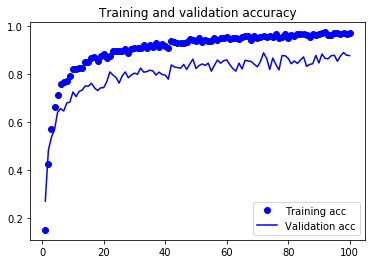

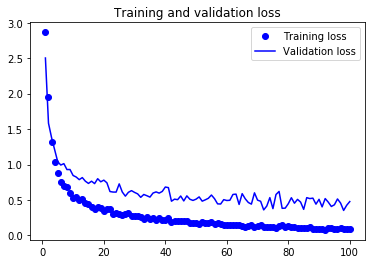

In [0]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

#正解率plot
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()


#損失値をplot
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [0]:
#モデルを保存するなら
model.save('weed_type.h1')

In [16]:
#一枚の画像入力デモ
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input,decode_predictions
import numpy as np

img_path2 = "/content/drive/My Drive/cluster0312/mameasagao1/mameasagao_IMG_4176_1.JPG"
img=image.load_img(img_path2,target_size=(150,150))
img_tensor=image.img_to_array(img)
img_tensor=np.expand_dims(img_tensor,axis=0)
img_tensor/=255.
print(img_tensor.shape)


(1, 150, 150, 3)


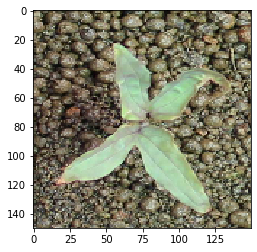

In [17]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()
#2回やる

In [0]:
model.load_weights('weed_type.h1')

In [0]:
from PIL import Image

img = Image.open(img_path2).convert('RGB') 
img = img.resize((150,150))
x = np.array(img, dtype=np.float32)
x = x / 255.

x = x[None, ...]

pred = model.predict(x, batch_size=1, verbose=0)
score = np.max(pred)
pred_label = np.argmax(pred)